<a href="https://www.kaggle.com/code/shivangi124/e-commerce-analysis?scriptVersionId=191307759" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/e-commerce-sales-analysis/ecommerce_sales_analysis.csv


# Load Libraries

In [2]:
import numpy as np
import pandas as pad
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [3]:
df = pd.read_csv("/kaggle/input/e-commerce-sales-analysis/ecommerce_sales_analysis.csv")
df

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Product_996,Home & Kitchen,50.33,3.6,494,488,359,137,787,678,970,282,155,57,575,634,393
996,997,Product_997,Home & Kitchen,459.07,4.8,701,18,906,129,78,19,110,403,683,104,858,729,474
997,998,Product_998,Sports,72.73,1.3,287,725,109,193,657,215,337,664,476,265,344,888,654
998,999,Product_999,Sports,475.37,1.2,720,196,191,315,622,854,122,65,938,521,268,60,394


# Data Understanding

In [4]:
# Number of rows and columns 
df.shape

(1000, 18)

In [5]:
# Index of Dataset
df.index

RangeIndex(start=0, stop=1000, step=1)

In [6]:
# Column Names
df.columns

Index(['product_id', 'product_name', 'category', 'price', 'review_score',
       'review_count', 'sales_month_1', 'sales_month_2', 'sales_month_3',
       'sales_month_4', 'sales_month_5', 'sales_month_6', 'sales_month_7',
       'sales_month_8', 'sales_month_9', 'sales_month_10', 'sales_month_11',
       'sales_month_12'],
      dtype='object')

In [7]:
# dtypes of each column
df.dtypes

product_id          int64
product_name       object
category           object
price             float64
review_score      float64
review_count        int64
sales_month_1       int64
sales_month_2       int64
sales_month_3       int64
sales_month_4       int64
sales_month_5       int64
sales_month_6       int64
sales_month_7       int64
sales_month_8       int64
sales_month_9       int64
sales_month_10      int64
sales_month_11      int64
sales_month_12      int64
dtype: object

In [8]:
# Count of Unique Values in each column
df.nunique()

product_id        1000
product_name      1000
category             7
price              992
review_score        41
review_count       620
sales_month_1      634
sales_month_2      629
sales_month_3      630
sales_month_4      640
sales_month_5      627
sales_month_6      639
sales_month_7      628
sales_month_8      643
sales_month_9      632
sales_month_10     637
sales_month_11     632
sales_month_12     632
dtype: int64

In [9]:
# Count of Non-NULL values in each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      1000 non-null   int64  
 1   product_name    1000 non-null   object 
 2   category        1000 non-null   object 
 3   price           1000 non-null   float64
 4   review_score    1000 non-null   float64
 5   review_count    1000 non-null   int64  
 6   sales_month_1   1000 non-null   int64  
 7   sales_month_2   1000 non-null   int64  
 8   sales_month_3   1000 non-null   int64  
 9   sales_month_4   1000 non-null   int64  
 10  sales_month_5   1000 non-null   int64  
 11  sales_month_6   1000 non-null   int64  
 12  sales_month_7   1000 non-null   int64  
 13  sales_month_8   1000 non-null   int64  
 14  sales_month_9   1000 non-null   int64  
 15  sales_month_10  1000 non-null   int64  
 16  sales_month_11  1000 non-null   int64  
 17  sales_month_12  1000 non-null   in

In [10]:
# Check for missing values
df.isnull().sum()

product_id        0
product_name      0
category          0
price             0
review_score      0
review_count      0
sales_month_1     0
sales_month_2     0
sales_month_3     0
sales_month_4     0
sales_month_5     0
sales_month_6     0
sales_month_7     0
sales_month_8     0
sales_month_9     0
sales_month_10    0
sales_month_11    0
sales_month_12    0
dtype: int64

In [11]:
# Check rows wise and detect the duplicate rows
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [12]:
# Drop rows that contains all missing values
df.dropna()

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Product_996,Home & Kitchen,50.33,3.6,494,488,359,137,787,678,970,282,155,57,575,634,393
996,997,Product_997,Home & Kitchen,459.07,4.8,701,18,906,129,78,19,110,403,683,104,858,729,474
997,998,Product_998,Sports,72.73,1.3,287,725,109,193,657,215,337,664,476,265,344,888,654
998,999,Product_999,Sports,475.37,1.2,720,196,191,315,622,854,122,65,938,521,268,60,394


In [13]:
# Display unique values in each categorical column
df['category'].unique()

array(['Clothing', 'Home & Kitchen', 'Toys', 'Books', 'Electronics',
       'Health', 'Sports'], dtype=object)

# Summary Statistics

In [14]:
# Display summary statistics for numerical columns
df.describe()

,product_id,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,247.677130,3.027600,526.506000,498.306000,507.661000,506.739000,503.823000,487.194000,491.653000,507.011000,504.569000,491.934000,514.798000,505.83800,500.386000
std,288.819436,144.607983,1.171243,282.269932,289.941478,285.992689,294.010873,286.645567,287.844324,289.234018,291.047287,289.945691,287.514731,288.710119,288.82451,278.509459
min,1.000000,7.290000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,1.000000,0.00000,4.000000
25%,250.750000,121.810000,2.000000,283.750000,245.500000,262.500000,243.750000,261.500000,221.000000,236.000000,254.000000,240.500000,247.250000,267.000000,251.25000,259.000000
50%,500.500000,250.920000,3.100000,543.000000,507.500000,508.000000,493.000000,501.500000,497.000000,479.500000,522.500000,499.500000,495.500000,532.000000,502.00000,500.500000
75%,750.250000,373.435000,4.000000,772.000000,740.750000,756.250000,777.250000,749.500000,727.000000,740.500000,757.250000,762.250000,735.250000,770.250000,761.00000,730.000000
max,1000.000000,499.860000,5.000000,999.000000,1000.000000,1000.000000,999.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000


In [15]:
df.head()

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257


# Distribution of products across categories

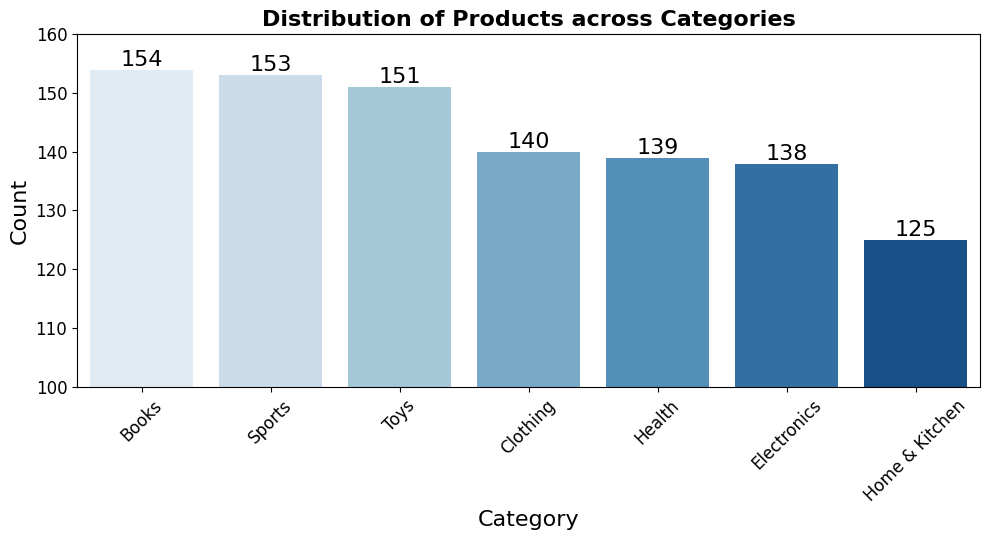

In [16]:
# Distribution of products across categories
category_distribution = df['category'].value_counts()

plt.figure(figsize = (10,5.5))

# Plot countplot 
ax = sns.countplot(data = df, x ='category',palette = 'Blues',order = df['category'].value_counts().index)

abs_values = df['category'].value_counts(ascending = False).values
ax.bar_label(container = ax.containers[0],labels = abs_values, fontsize = 16)

plt.title('Distribution of Products across Categories',weight = 'bold',fontsize = 16)
plt.xlabel('Category', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
ax.set(ylim = (100,160))
plt.xticks(rotation = 45,fontsize = 12 )
plt.yticks(fontsize = 12)

plt.tight_layout()
plt.show()

__INSIGHT__
1. Balanced Category Distribution: The distribution of products across categories is relatively balanced. This suggests a diversified product range and potentially a broad target market.

2. High Product Counts in Core Categories: Categories such as Books, Sports, and Toys have the highest number of products, indicating these are key areas of focus. 

3. Consistent Representation: Categories like Clothing, Health, Electronics, and Home Kitchen have fewer products but still maintain a substantial presence.

# Sales Performance Analysis

 __1.  Total Sales__

In [17]:
# Total Sales per Product
df['Total Sales'] = df[['sales_month_1', 'sales_month_2', 'sales_month_3',
       'sales_month_4', 'sales_month_5', 'sales_month_6', 'sales_month_7',
       'sales_month_8', 'sales_month_9', 'sales_month_10', 'sales_month_11',
       'sales_month_12']].sum(axis = 1)
df.head()

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12,Total Sales
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306,6421
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353,6027
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392,5580
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203,5022
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257,6094


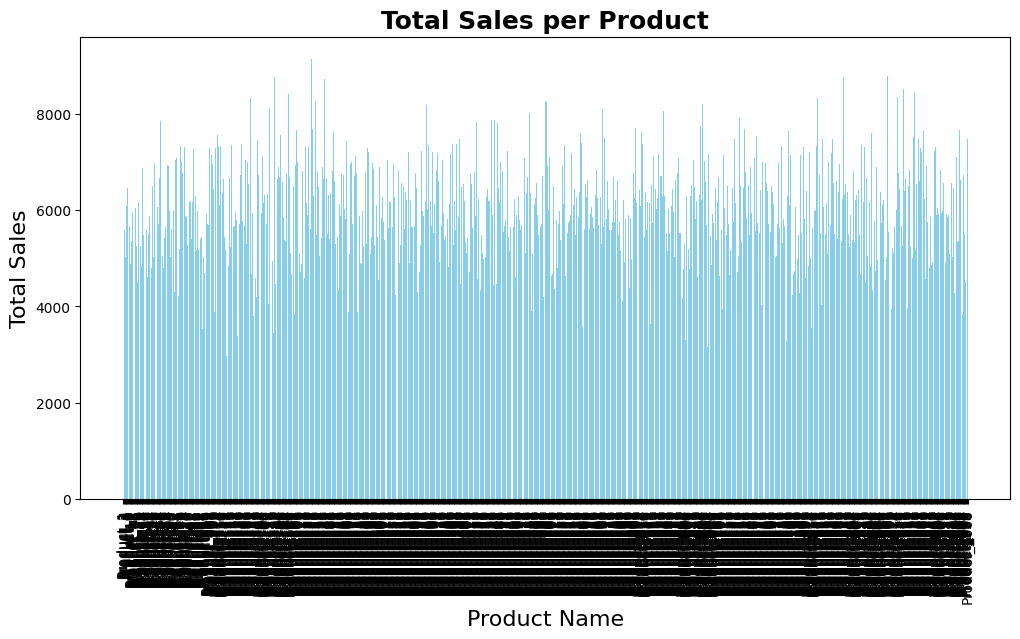

In [18]:
# Plot the Total Sales

plt.figure(figsize=(12,6))
plt.bar('product_name','Total Sales',data = df, color='skyblue')
plt.xlabel('Product Name',fontsize = 16)
plt.ylabel('Total Sales',fontsize = 16)
plt.title('Total Sales per Product',weight = 'bold',fontsize = 18)
plt.xticks(rotation=90)
plt.show()

__2.  Top 10 Products by Sales__

In [19]:
df['Total Revenue'] = df['price']* df['Total Sales']

top_10_products_by_sales = df.sort_values(by = 'Total Sales',ascending=False).reset_index()
top_10_products_by_sales.head(10)

,index,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,...,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12,Total Sales,Total Revenue
0,223,224,Product_224,Electronics,187.02,4.8,613,827,749,510,...,784,352,976,918,873,601,857,908,9151,1711420.02
1,285,286,Product_286,Clothing,22.79,3.1,728,951,933,701,...,600,572,825,834,596,573,710,840,8921,203309.59
2,733,734,Product_734,Health,263.92,2.7,30,366,992,375,...,857,782,165,851,941,908,715,969,8914,2352582.88
3,904,905,Product_905,Sports,213.61,4.0,520,850,967,941,...,965,785,977,332,399,627,696,411,8783,1876136.63
4,179,180,Product_180,Sports,73.07,3.2,268,725,756,405,...,757,923,598,833,909,985,717,569,8775,641189.25
5,852,853,Product_853,Books,108.90,4.4,305,80,1000,641,...,807,905,686,804,1000,732,318,874,8765,954508.50
6,238,239,Product_239,Health,324.51,4.9,575,875,864,660,...,561,844,836,731,548,860,811,411,8724,2831025.24
7,923,924,Product_924,Electronics,400.93,2.4,758,992,746,783,...,651,821,800,656,726,495,67,793,8525,3417928.25
8,936,937,Product_937,Electronics,14.10,2.1,883,957,510,885,...,734,91,692,716,383,913,770,890,8459,119271.90
9,196,197,Product_197,Toys,364.35,4.9,104,576,962,972,...,928,220,748,343,848,742,946,762,8418,3067098.30


__TOP 10 PRODUCTS BY REVENUE__

In [20]:
top_10_products_by_revenue = df.sort_values(by = 'Total Revenue',ascending=False).head(10).reset_index()
top_10_products_by_revenue

,index,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,...,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12,Total Sales,Total Revenue
0,305,306,Product_306,Books,488.05,4.5,943,539,963,932,...,502,335,433,402,616,981,674,625,7811,3812158.55
1,531,532,Product_532,Books,499.86,3.4,162,667,48,734,...,658,950,989,438,588,615,829,303,7530,3763945.80
2,52,53,Product_53,Sports,470.05,4.8,313,193,97,734,...,798,842,765,913,953,746,885,33,7920,3722796.00
3,228,229,Product_229,Electronics,446.56,4.9,758,905,720,607,...,849,949,270,745,722,72,756,898,8282,3698409.92
4,390,391,Product_391,Books,495.30,1.9,507,527,234,510,...,918,948,681,784,656,177,444,491,7370,3650361.00
5,522,523,Product_523,Toys,485.11,2.4,772,619,715,959,...,846,997,596,873,22,471,501,370,7351,3566043.61
6,140,141,Product_141,Books,481.41,4.3,376,159,799,236,...,537,667,816,559,791,579,888,890,7374,3549917.34
7,112,113,Product_113,Clothing,465.20,1.9,435,564,946,876,...,731,719,364,228,838,695,156,528,7567,3520168.40
8,751,752,Product_752,Health,470.22,1.9,118,247,858,503,...,928,518,392,378,32,955,873,951,7484,3519126.48
9,475,476,Product_476,Toys,496.52,3.7,325,558,628,738,...,439,803,30,920,177,643,591,576,7081,3515858.12


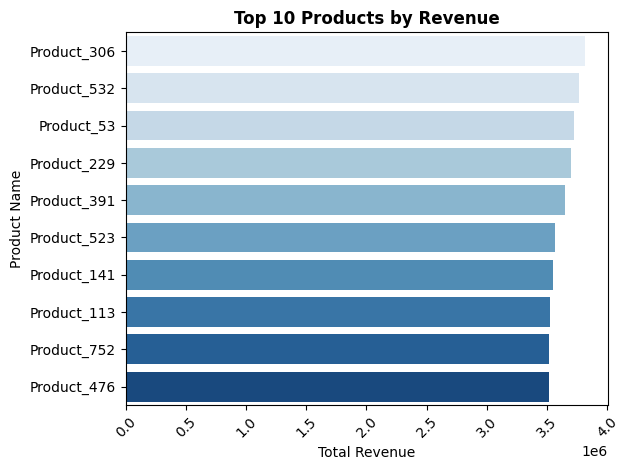

In [21]:
# Plotting Top 10 Products by Revenue
ax = sns.barplot(data  =top_10_products_by_revenue, x = 'Total Revenue', y= 'product_name',palette = 'Blues' )
plt.title('Top 10 Products by Revenue', weight = 'bold')
plt.xlabel("Total Revenue")
plt.ylabel('Product Name')
plt.xticks(rotation =45)
ax.set_xlim()

plt.tight_layout()
plt.show()

__3.   Monthly Sales Trends__

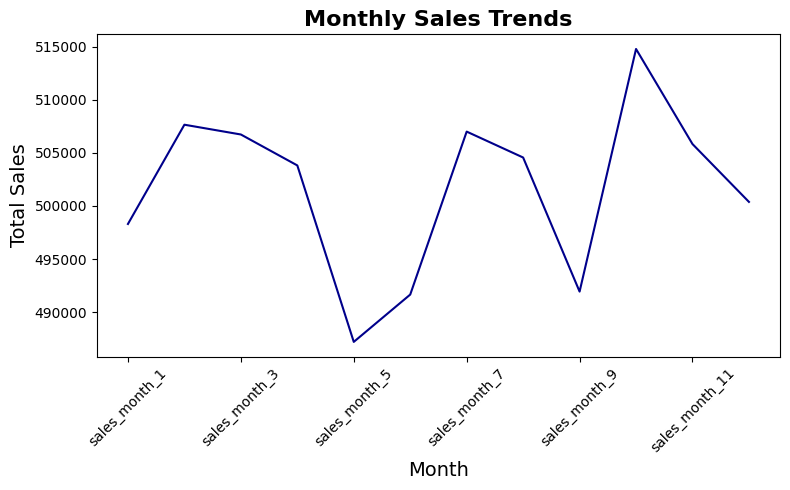

In [22]:
# Analyze sales trends over the 12 months 
sales_columns = [f'sales_month_{i}' for i in range(1,13)]
monthly_sales = df[sales_columns].sum()

# Plot the line chart
plt.figure( figsize=(8,5))
monthly_sales.plot(kind='line', color= 'darkblue')
plt.xlabel('Month',fontsize = 14)
plt.ylabel('Total Sales',fontsize = 14)
plt.title( 'Monthly Sales Trends',weight = 'bold',fontsize = 16)
plt.xticks(rotation =45)

plt.tight_layout()
plt.show()


__INSIGHT__
1. Sales fluctuate, with peaks and troughs indicating variability.
2. The highest sales month appears to be “sales_month_3,” while “sales_month_9” shows a dip.
3. Overall, sales seem to hover around the 500,000 to 510,000 range.

__CATEGORY SALES__

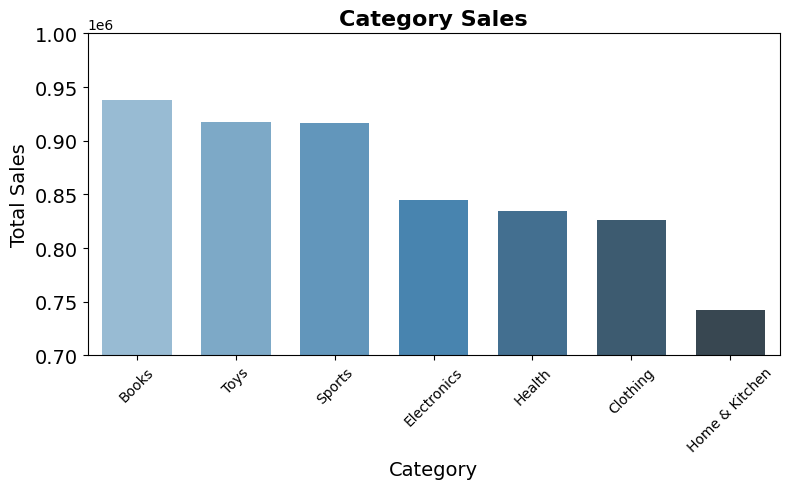

In [23]:
# Aggregate sales data by category
category_sales= df.groupby('category')['Total Sales'].sum().reset_index()

# Plot the Category sales
plt.figure(figsize = (8,5))

ax = sns.barplot(data = category_sales.sort_values(by='Total Sales', ascending=False), x= 'category', y= 'Total Sales',width =0.7, palette = 'Blues_d')
plt.title('Category Sales',weight = 'bold',fontsize = 16)
plt.xlabel('Category',fontsize = 14)
plt.ylabel('Total Sales',fontsize = 14)

plt.yticks(fontsize = 14)
plt.xticks(rotation = 45)

ax.set(ylim= (700000, 1000000))

plt.tight_layout()
plt.show()

__INSIGHT__
1. Books, Toys, Sports, and Electronics have relatively similar sales volumes. These categories perform well.
2. Health category shows slightly lower sales (around 0.85), indicating room for improvement.
3. Home & Kitchen has significantly lower sales (below 0.75), suggesting a need for attention or strategic adjustments.

# Price Analysis

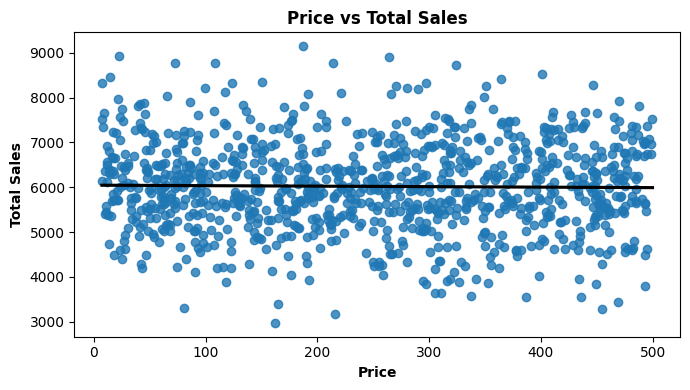

In [24]:
plt.figure(figsize=(7,4))

# Price Vs Total Sales
sns.regplot(x='price', y='Total Sales', data=df, ci = None, line_kws = {"color": "black"})
plt.title('Price vs Total Sales', weight = 'bold')
plt.xlabel('Price', weight = 'bold')
plt.ylabel('Total Sales', weight = 'bold')


plt.tight_layout()
plt.show()

__INSIGHT__
1. There is no strong relationship between price and total sales as indicated by the nearly flat regression line.
2. The price of a product does not significantly impact its total sales volume.

__PRICE DISTRUBUTION__

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


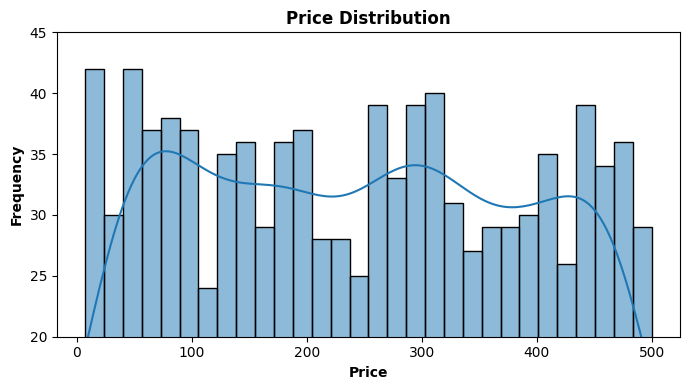

In [25]:
plt.figure(figsize = (7,4))

# Price Distribution
ax = sns.histplot(data=df, x="price", bins=30, kde = True)

plt.title('Price Distribution', weight = 'bold')
plt.xlabel('Price', weight = 'bold')
plt.ylabel('Frequency', weight = 'bold')
ax.set_ylim(20,45)

plt.tight_layout()
plt.show()

__INSIGHT__
1. Prices are relatively evenly distributed, with no significant peaks or valleys. 
2. The KDE line indicates a smooth distribution with some variability, but no extreme outliers or skewness in pricing.

__AVERAGE PRICE OF EACH CATEGORY__

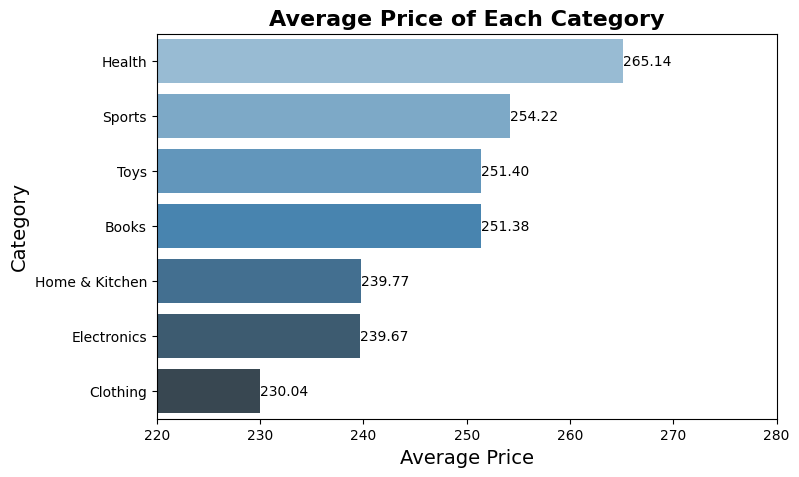

In [26]:
category_avg_price = df.groupby('category')['price'].mean().sort_values(ascending=False).reset_index()

# Average Price for each category
plt.figure(figsize=(8,5))
ax = sns.barplot(x='price', y='category', data=category_avg_price, palette='Blues_d')

# data labels
for index, value in enumerate(category_avg_price['price']):
    plt.text(value, index, f'{value:.2f}', va='center', ha='left', color='black',fontsize = 10)

plt.title('Average Price of Each Category',weight = 'bold',fontsize =16)
plt.xlabel('Average Price',fontsize =14)
plt.ylabel('Category',fontsize =14)
ax.set_xlim(220,280)
plt.show()

__INSIGHT__
1. The Health category has the highest average price (around 265.14), indicating premium-priced items.
2. Sports, Toys, and Books follow closely with similar average prices (around 254.22).
3. Home & Kitchen has a lower average price (around 239.77), while Electronics and Clothing fall below 230.

# Review Analysis

__REVIEW SCORE DISTRIBUTION__

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


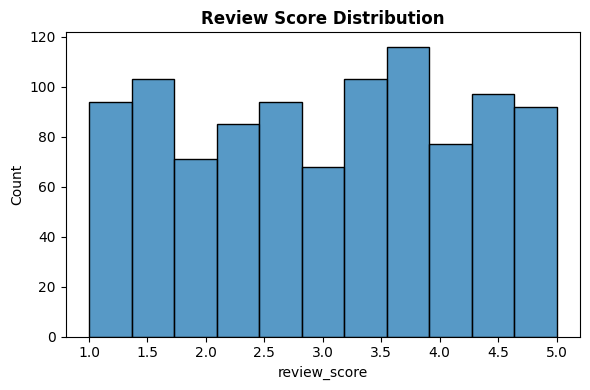

In [27]:
plt.figure(figsize = (6,4))

# Histogram
sns.histplot(data = df, x= 'review_score', bins = 'auto')
plt.title("Review Score Distribution", weight = 'bold')

plt.tight_layout()
plt.show()

__REVIEW COUNT IMPACT__

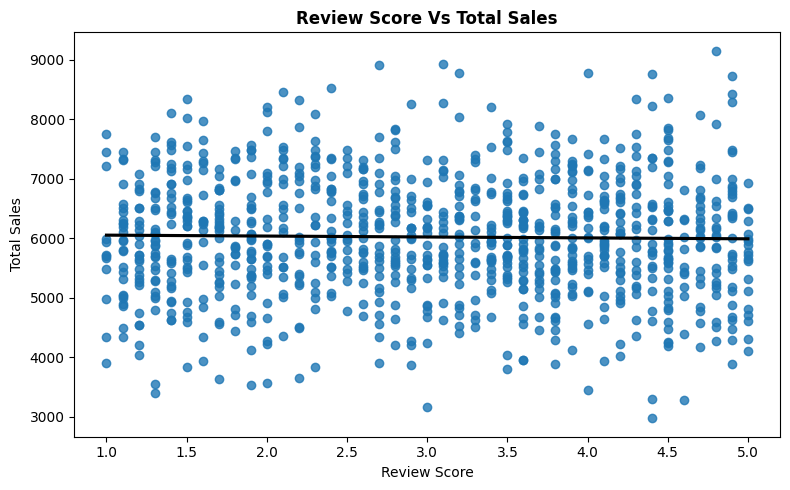

In [28]:
review_count_impact = df.groupby("review_score")['Total Sales']

plt.figure(figsize = (8,5))
# scatter plot
sns.regplot(data =df,y= 'Total Sales', x='review_score', ci = None, line_kws = {'color':'black'} )

plt.title("Review Score Vs Total Sales", weight = 'bold')
plt.xlabel('Review Score')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

__INSIGHT__
1. The scatter plot does not show a strong correlation between review scores and total sales. The regression line is almost flat, indicating that changes in review scores do not significantly impact total sales.

__HIGH REVIEW PRODUCTS__

In [29]:
# Filter data with high review score
high_review = df[df['review_score']>4.0]

# Average total sales for high review products
average_total_sales_high_review = high_review.groupby('category')['Total Sales'].mean().sort_index(ascending = False).reset_index()
average_total_sales_high_review

,category,Total Sales
0,Toys,6105.709677
1,Sports,6013.324324
2,Home & Kitchen,5871.312500
3,Health,5902.500000
4,Electronics,6168.937500
5,Clothing,5666.406250
6,Books,6115.906977


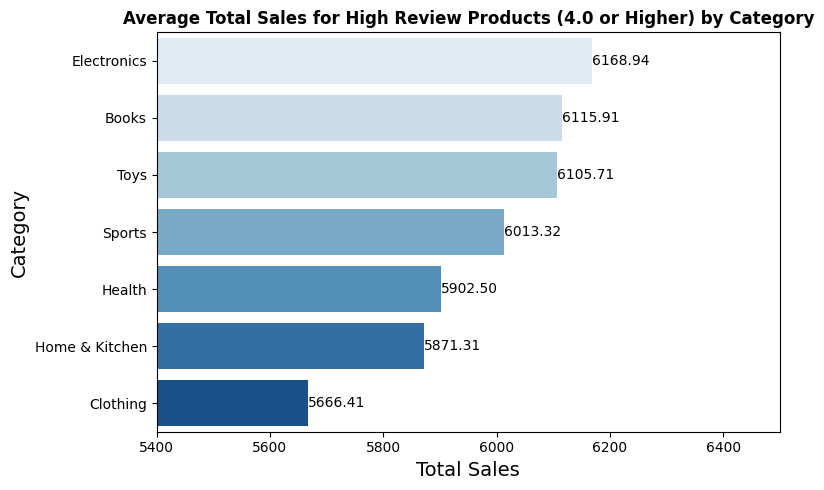

In [30]:
plt.figure(figsize = (8,5))

# Plot 
ax = sns.barplot(data = average_total_sales_high_review.sort_values(by = 'Total Sales',ascending = False), x = 'Total Sales', y= 'category',palette = 'Blues')

# Data Labels
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', color='black')

plt.title("Average Total Sales for High Review Products (4.0 or Higher) by Category", weight = 'bold')
plt.xlabel('Total Sales', fontsize =14)
plt.ylabel('Category', fontsize =14)
ax.set_xlim(5400, 6500)

plt.tight_layout()
plt.show()

    

__INSIGHT__
1. Electronics: This category stands out with the highest average total sales. It’s likely that high-demand electronic products contribute significantly to this figure.
2. Books: Books follow closely, with an average total sales value. 
3. Home & Kitchen: This category has the lowest average total sales.

# Category Analysis

__CATEGORY PERFORMANCE__

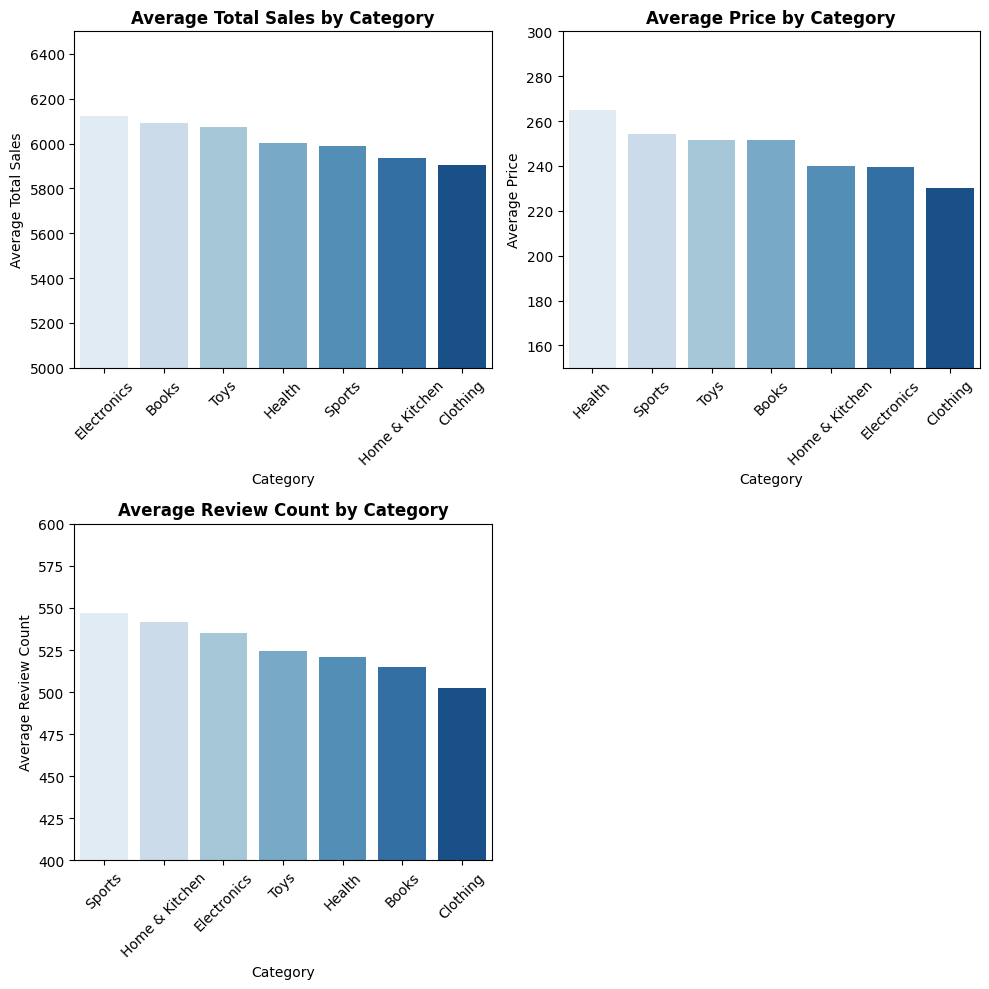

In [31]:
plt.figure(figsize = (10,10))

# Aggregate data by category
category_performance = df.groupby('category').agg({
    'Total Sales': 'mean',
    'price': 'mean',
    'review_count':'mean'
}).reset_index()

# Plot average total sales by category
plt.subplot(2,2,1)
ax1 = sns.barplot(y='Total Sales', x='category', data=category_performance.sort_values(by = 'Total Sales',ascending = False), palette='Blues')
plt.title('Average Total Sales by Category', weight = 'bold')
plt.ylabel('Average Total Sales')
plt.xlabel('Category')

plt.xticks(rotation = 45)
ax1.set_ylim(5000,6500)

# Plot average price by category
plt.subplot(2,2,2)
ax2 = sns.barplot(y='price', x='category', data=category_performance.sort_values(by = 'price',ascending = False), palette='Blues')
plt.title('Average Price by Category', weight = 'bold')
plt.ylabel('Average Price')
plt.xlabel('Category')
    
plt.xticks(rotation = 45)
ax2.set_ylim(150, 300)

# Plot average review count by category
plt.subplot(2,2,3)
ax1 = sns.barplot(y='review_count', x='category', data=category_performance.sort_values(by = 'review_count',ascending = False), palette='Blues')
plt.title('Average Review Count by Category', weight = 'bold')
plt.xlabel('Category')
plt.ylabel('Average Review Count')

plt.xticks(rotation = 45)
ax1.set_ylim(400, 600)

plt.tight_layout()
plt.show()

In [32]:
category_performance

,category,Total Sales,price,review_count
0,Books,6092.396104,251.384805,514.694805
1,Clothing,5903.828571,230.041786,502.478571
2,Electronics,6124.057971,239.674275,535.231884
3,Health,6002.978417,265.142590,520.848921
4,Home & Kitchen,5937.128000,239.769680,541.880000
5,Sports,5989.352941,254.216275,547.228758
6,Toys,6073.516556,251.402980,524.337748


__INSIGHT__

__Total Sales Analysis:__

Highest Total Sales: Electronics have the highest total sales, indicating strong performance in this category.

Lowest Total Sales: Clothing has the lowest total sales, though the difference is minimal compared to other categories.

__Price Analysis:__

Highest Average Price: Health products have the highest average price, which could suggest that this category deals with more premium or specialized items.

Lowest Average Price: Clothing has the lowest average price, indicating that products in this category are generally more affordable.

__Review Count Analysis:__

Highest Review Count: Toys have the highest average review count at 524.34, suggesting high customer engagement or popularity in this category.

Lowest Review Count: Clothing has the lowest average review count at 502.48, which might indicate less frequent reviews compared to other categories.

__Price vs. Total Sales:__

Electronics: This category has a high total sales figure with a moderate price point, suggesting a balance between affordability and sales performance.

Health: Despite having the highest price, the total sales are not the highest, which could imply that while products are priced higher, they do not sell as much as those in other categories.

__Review Count vs. Total Sales:__

Toys: High review count and high total sales suggest a positive correlation between customer feedback and sales performance in this category.

Clothing: Lower review count and lower total sales could indicate potential areas for improvement in customer engagement or product appeal.

__Category Performance Comparison:__

Books, Home & Kitchen, and Sports show balanced metrics across total sales, price, and review count. These categories perform consistently well in terms of sales while maintaining moderate price points and review counts.

# Sales Trend and Seasonality

__SALES GROWTH__

 Month-to-Month sales growth rate percentage.

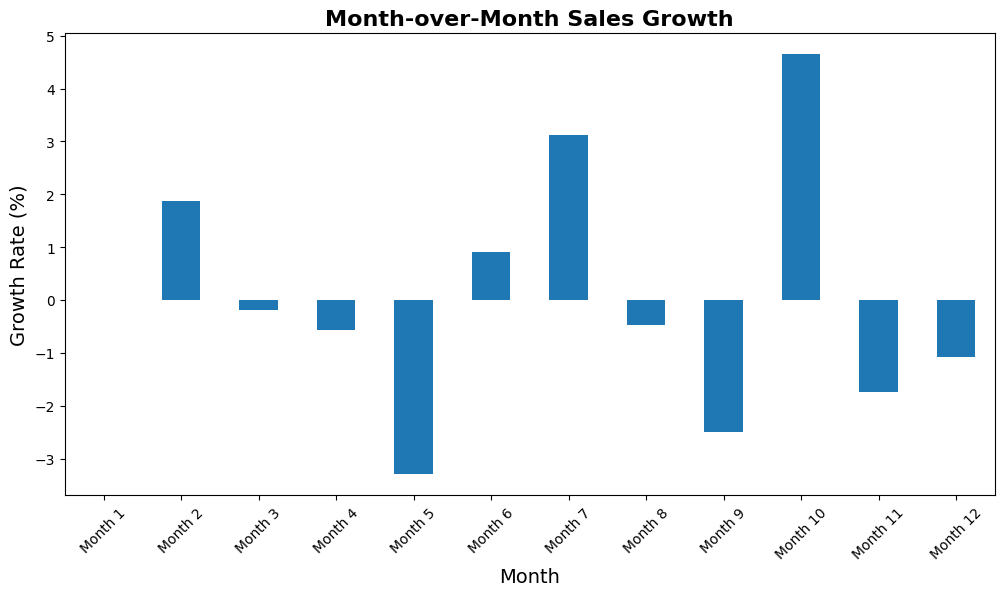

In [33]:
monthly_sales = df[sales_columns].mean()

# Sales Growth

# Monthly Sales Growth (Month-over-Month)
monthly_sales_data = df[sales_columns].sum()
monthly_growth = monthly_sales_data.pct_change().fillna(0) * 100  # Convert to percentage

# Plot Month-over-Month Sales Growth
plt.figure(figsize=(12, 6))
monthly_growth.plot(kind='bar')
plt.title('Month-over-Month Sales Growth', weight = 'bold', fontsize =16)
plt.xlabel('Month', fontsize =14)
plt.ylabel('Growth Rate (%)', fontsize =14)
plt.xticks(ticks=range(12), labels=[f'Month {i+1}' for i in range(12)], rotation=45)
plt.show()

In [34]:
monthly_growth

sales_month_1     0.000000
sales_month_2     1.877360
sales_month_3    -0.181617
sales_month_4    -0.575444
sales_month_5    -3.300564
sales_month_6     0.915241
sales_month_7     3.123748
sales_month_8    -0.481646
sales_month_9    -2.504117
sales_month_10    4.647778
sales_month_11   -1.740489
sales_month_12   -1.077815
dtype: float64

__MONTHLY SALES__

In [35]:
monthly_sales = df[sales_columns].mean()
print(monthly_sales)

sales_month_1     498.306
sales_month_2     507.661
sales_month_3     506.739
sales_month_4     503.823
sales_month_5     487.194
sales_month_6     491.653
sales_month_7     507.011
sales_month_8     504.569
sales_month_9     491.934
sales_month_10    514.798
sales_month_11    505.838
sales_month_12    500.386
dtype: float64


__Average Sales for each Category and Month__

__PIVOT__

In [36]:
melted_data = df.melt(id_vars=['product_id', 'product_name', 'category', 'price', 'review_score', 'review_count'],
                        value_vars=sales_columns,
                        var_name='month',
                        value_name='sales')

# Extract the month number from the 'month' column
melted_data['month'] = melted_data['month'].str.extract('(\d+)').astype(int)

# Create a pivot table with the average sales for each category and month
pivot_table = melted_data.pivot_table(values='sales', index='category', columns='month', aggfunc='mean').fillna(0)
pivot_table

month,1,2,3,4,5,6,7,8,9,10,11,12
category,,,,,,,,,,,,
Books,506.051948,519.993506,499.987013,485.058442,513.318182,497.688312,513.727273,507.194805,501.370130,542.233766,497.123377,508.649351
Clothing,435.471429,485.078571,548.542857,500.628571,440.307143,450.878571,472.178571,531.585714,519.107143,491.471429,512.021429,516.557143
Electronics,553.239130,525.159420,512.376812,530.130435,522.963768,507.681159,523.355072,476.478261,506.623188,508.318841,493.826087,463.905797
Health,486.647482,485.122302,486.345324,524.640288,497.683453,459.899281,541.410072,497.309353,464.611511,522.395683,521.582734,515.330935
Home & Kitchen,462.752000,458.016000,501.336000,523.104000,478.128000,505.352000,481.032000,520.336000,465.080000,519.008000,530.248000,492.736000
Sports,508.084967,537.542484,490.908497,485.535948,480.176471,494.385621,503.803922,483.084967,517.705882,524.098039,485.424837,478.601307
Toys,528.715232,531.596026,509.000000,485.284768,476.291391,523.774834,510.609272,517.913907,464.960265,494.463576,505.953642,524.953642


__HEATMAP__

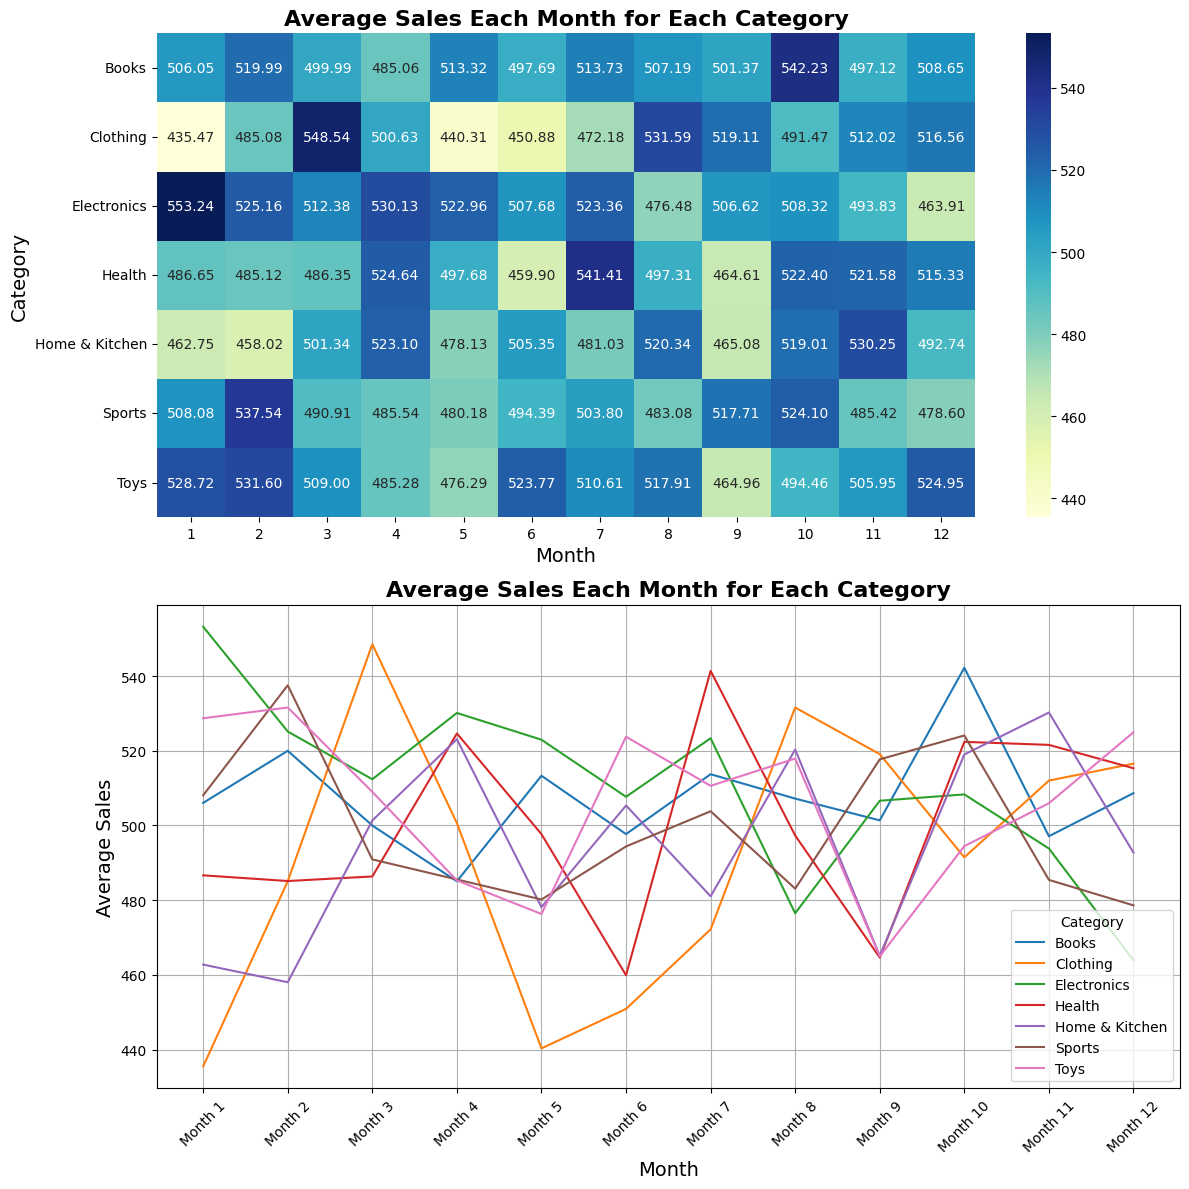

In [37]:
plt.figure(figsize = (12,12))

# Heatmap 
plt.subplot(2,2,(1,2))
sns.heatmap(pivot_table, annot=True, fmt='.2f', cmap='YlGnBu')

plt.title('Average Sales Each Month for Each Category', weight = 'bold', fontsize =16)
plt.xlabel('Month', fontsize =14)
plt.ylabel('Category', fontsize =14)

# Line Chart
plt.subplot(2,2,(3,4))
for category in pivot_table.index:
    plt.plot(pivot_table.columns, pivot_table.loc[category], label=category)
    
plt.title('Average Sales Each Month for Each Category', weight = 'bold', fontsize =16)
plt.xlabel('Month', fontsize =14)
plt.ylabel('Average Sales', fontsize =14)
plt.legend(title='Category')
plt.xticks(ticks=range(1, 13), labels=[f'Month {i}' for i in range(1, 13)])
plt.grid(True)
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()



__Total Revenue by each Category__

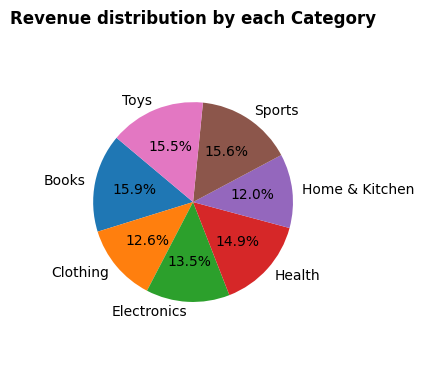

In [38]:
# Pie Chart for Revenue by each category
plt.figure(figsize = (4, 4))

revenue_each_category = df.groupby('category')['Total Revenue'].sum()

plt.pie(revenue_each_category,labels =revenue_each_category.index,  autopct = '%1.1f%%', startangle = 140 )
plt.title("Revenue distribution by each Category", weight = 'bold')
plt.axis('equal')

plt.tight_layout()
plt.show()

# Correlation Analysis

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

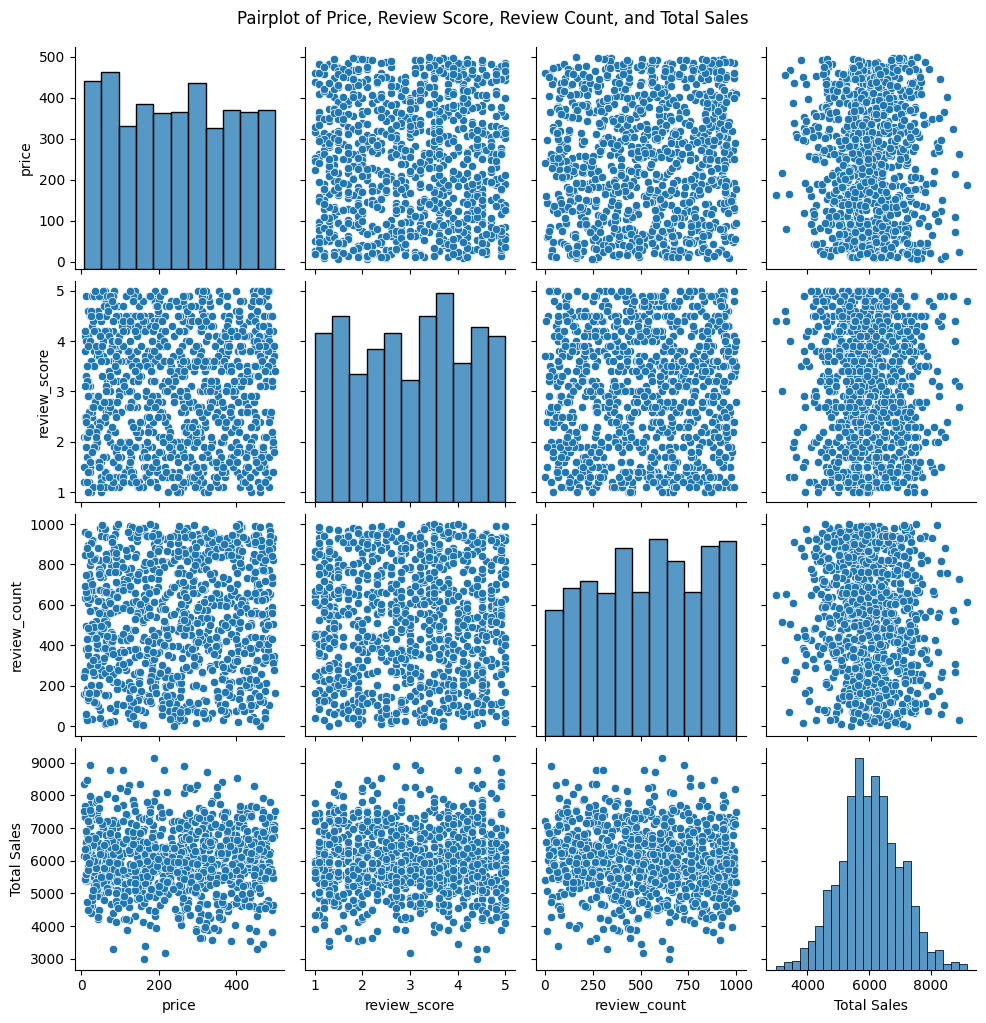

In [39]:
columns_of_interest = ['price', 'review_score', 'review_count', 'Total Sales']

# Create a subset of the data
subset_data = df[columns_of_interest]

# Plot the pairplot
sns.pairplot(subset_data)
plt.suptitle('Pairplot of Price, Review Score, Review Count, and Total Sales', y=1.02)
plt.show()

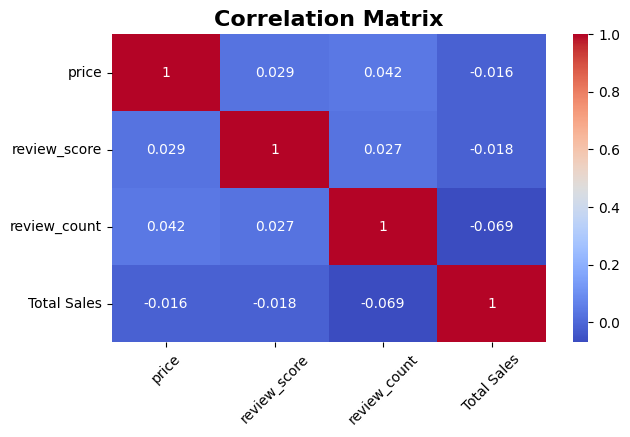

In [40]:
plt.figure(figsize=(7,4))
corr_matrix = df[['price', 'review_score', 'review_count', 'Total Sales']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix', weight ='bold', fontsize =16)
plt.xticks(rotation =45)

plt.show()

# Total Sales and Total Revenue by Category

In [41]:
pivot = pd.pivot_table(df, values=['Total Sales', 'Total Revenue'], index = 'category', aggfunc = 'sum')
pivot_sorted = pivot.sort_values(by = 'Total Revenue', ascending = False)
pivot_sorted

,Total Revenue,Total Sales
category,,
Books,2.367828e+08,938229
Sports,2.326488e+08,916371
Toys,2.302372e+08,917101
Health,2.217369e+08,834414
Electronics,2.016747e+08,845120
Clothing,1.872583e+08,826536
Home & Kitchen,1.783655e+08,742141


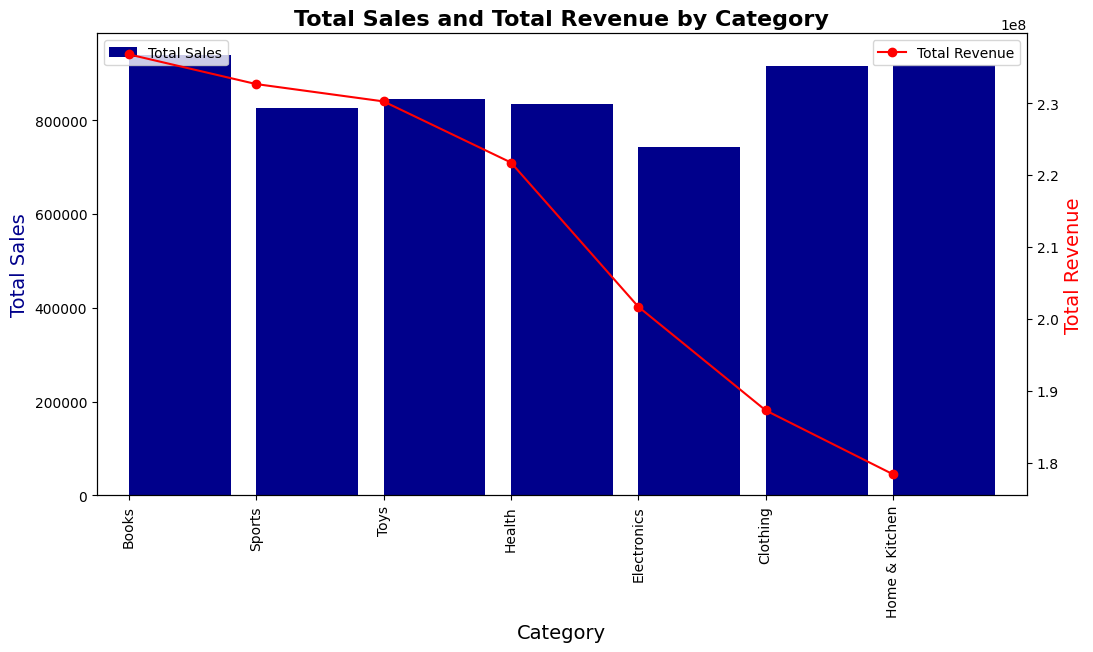

In [42]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar Plot for Total Sales
pivot['Total Sales'].plot(kind='bar', ax=ax1, color='darkblue', width=0.8, position=0, label='Total Sales')

# Line Plot for Total Revenue
ax2 = ax1.twinx()  # Create a second y-axis
pivot_sorted['Total Revenue'].plot(kind='line', ax=ax2, color='r', marker='o', label='Total Revenue')

# Formatting
ax1.set_xlabel('Category', fontsize =14)
ax1.set_ylabel('Total Sales', color='darkblue', fontsize =14)
ax2.set_ylabel('Total Revenue', color='r', fontsize =14)

# Set titles and legends
ax1.set_title('Total Sales and Total Revenue by Category', weight = 'bold', fontsize =16)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotate x labels for better readability
plt.xticks(rotation=45)

plt.show()
